# Quantum Fourier Transform (QFT) 

[Reference](https://community.qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)

Fourier transform is a very important tool to signal processing. 

Here we will build a quantum version of a discrete fourier transform, this will be used in many quantum algorithms.

Discrete fourier transform is the map between two strings $F: (x_0, x_1, \dots, x_{N-1}) \rightarrow ((y_0, y_1, \dots, y_{N-1}))$.

\begin{equation}
F(x_k) = y_k = \frac{1}{\sqrt N} \sum_{l=0}^{N-1} x_l \omega_N^{lk}
\end{equation}

Where: $\omega_N^{lk} =  exp\left(2\pi i \frac{lk}{N}\right)$

Quantum Fourier transform does the same thing, but using quantum states: $F:\sum_{i=0}^{N-1} x_i\left| i \right> \rightarrow \sum_{i=0}^{N-1} y_i\left| i \right> $

\begin{equation}
F(x_k) = y_k = \frac{1}{\sqrt N} \sum_{l=0}^{N-1} x_l \omega_N^{lk}
\end{equation}

Where: $\omega_N^{lk} =  exp\left(2\pi i \frac{lk}{N}\right)$

This can be represented by an unitary matrix:
\begin{equation}
F = \frac{1}{\sqrt N} \sum_{x=0}^{N-1}\sum_{y=0}^{N-1} \omega_N^{lk}  \left| y \right> \left< x \right|
\end{equation}



To find the circuit representation of the Fourier transform we need to see how it works on $2^N$ qubits first:

\begin{equation}
\begin{split}
F\left(\left| m \right> _n\right) & = \frac{1}{\sqrt N} \sum_{k=0}^{N-1} \omega_N^{km} \left| k \right>_n \\
  & =  \frac{1}{\sqrt N} \sum_{k=0}^{N-1} exp\left( i \frac{2\pi}{N} mk \right) \left| k \right>_n  \\
  & =  \frac{1}{\sqrt N} \sum_{k_{n-1}=0}^{1} \dots \sum_{k_{0}=0}^{1} exp\left( i \frac{2\pi}{N} m \sum_{l=1}^n \frac{k_{n-l}}{2^l} \right) \left| k_{n-1} \dots k_0 \right>_n  \\
  & =  \frac{1}{\sqrt N} \sum_{k_{n-1}=0}^{1} \dots \sum_{k_{0}=0}^{1} \bigotimes_{l=1}^n exp\left( i \frac{2\pi}{N} m  \frac{k_{n-l}}{2^l} \right) \left| k_{n-l}\right>_n \\ 
  & =  \frac{1}{\sqrt N} \bigotimes_{l=1}^n \left[ \left| 0 \right> + exp\left( i \frac{2\pi m}{2^l} \right) \left| 1\right> \right]
\end{split}
\end{equation}
Now we use the binary representation of $\frac{m}{2^l}$: 
\begin{equation}
\begin{split}
\frac{m}{2^l} & = \sum_{p=1}^n m_{n-p} 2^{n-p-l}  = m_{n-1} 2^{n-1-l} + \dots + m_l 2^0 + \dots + m_0 2^{-l} & \equiv m_{n-1} \dots m_l . m_{l-1} \dots m_0 \\
 & = \sum_{p=1}^{n-l} m_{n-p} 2^{n-p-l} + \sum_{p=1}^{l} \frac{m_{l-p}}{2^l}  &
\end{split}
\end{equation}
Therefore:
\begin{equation}
	exp\left[ i \frac{2 \pi m}{2^l} \right] = exp\left[ i 2 \pi \sum_{p=1}^{n-l} m_{n-p} 2^{n-p-l} \right] exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right] = exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right]
\end{equation}
Now, we have that:
\begin{equation}
F(\left| m\right>_n) = \frac{1}{\sqrt{N}} \bigotimes_{l=1}^n \left[ \left| 0 \right> +exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right] \left| 1\right> \right]
\end{equation}

Consider first acting on 2 qubits(n=2):

\begin{equation}
\begin{split}
F(\left| m\right>_n) & =  \frac{1}{\sqrt{4}} \bigotimes_{l=1}^2 \left[ \left| 0 \right> +exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right] \left| 1\right> \right] \\
 & = \frac{1}{2} \left[ \left| 0 \right> +exp\left[i 2 \pi  0.m_0 \right] \left| 1\right>\right] \otimes \left[ \left| 0 \right> +exp\left[i 2 \pi  0.m_1m_0 \right] \left| 1\right>\right]
\end{split}
\end{equation}

Consider the following gate:

\begin{equation}
\begin{split}
R_k^{(0,1)} \left| m \right> \left| 0 \right> & =  & \left| 0 \right> \\
R_k^{(0,1)} \left| m \right> \left| 1 \right> & = & exp \left[ i 2 \pi \frac{m}{2^k} \right]   \left| 1 \right> 
\end{split}
\end{equation}

We can write the QFT as: 

\begin{equation}
F = SWAP[H^{(0)} R_2^{(0,1)} H^{(1)} \left| m \right>_2]
\end{equation}

Where the SWAP gate changes the order of the qubits. 

This can be easily generalized for N qubits as we can see below.

In [47]:
%matplotlib inline
import qiskit as qsk
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## N = 1

### Circuit

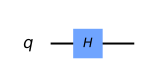

In [3]:
qreg = qsk.QuantumRegister(1, name='q')
qc = qsk.QuantumCircuit(qreg)
qc.h(qreg)
qc.draw('mpl')

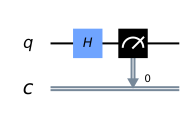

In [4]:
# Adding a classical register
creg = qsk.ClassicalRegister(1, name='c')
qc.add_register(creg)
qc.measure(qreg, creg)
qc.draw('mpl')

### Simulation

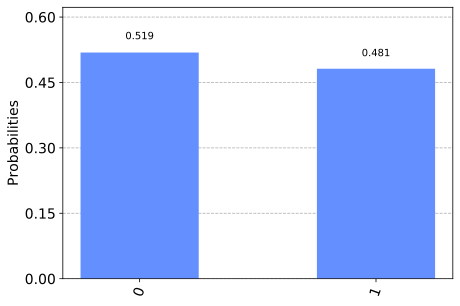

In [8]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

## N = 2

### Circuit

In [12]:
qreg = qsk.QuantumRegister(2, name='q')
qc = qsk.QuantumCircuit(qreg)

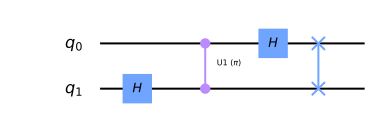

In [13]:
qc.h(qreg[1]);
qc.cu1(np.pi,qreg[0],qreg[1]);
qc.h(qreg[0]);
qc.swap(qreg[0],[1]);
qc.draw('mpl')

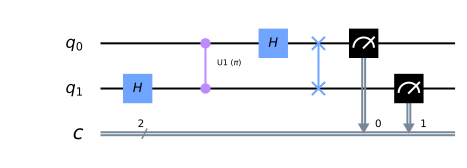

In [14]:
# Adding a classical register
creg = qsk.ClassicalRegister(2, name='c')
qc.add_register(creg)
qc.measure(qreg, creg)
qc.draw('mpl')

### Simulation

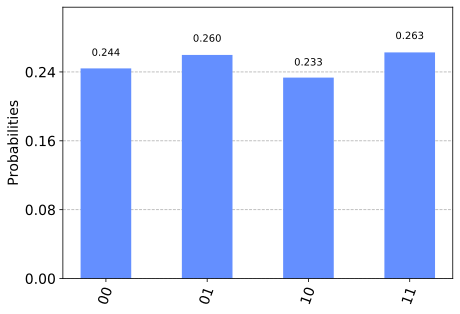

In [16]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Generalization for any N

## Defining rotations

We will define the controlled $R_k$ gate.

In [18]:
def qft_rotations(circuit, qregister):
    """ Defines the rotations necessary for the QFT
    in a recursive manner.

    Parameters
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit.
    qregister(qiskit.QuantumRegister): Quantum register for the rotation.

    Output
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit with
                                    qft.

    """
    for i in reversed(qregister):
        circuit.h(i)
        for qubit in range(i.index):
            circuit.cu1(np.pi/float(2**(i.index-qubit)), qregister[qubit], qregister[i.index])    
    return circuit    

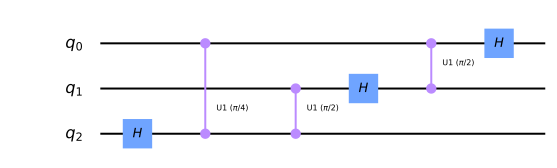

In [27]:
qreg = qsk.QuantumRegister(3, name='q')
qc = qsk.QuantumCircuit(qreg)
qft_rotations(qc, qreg)
qc.draw('mpl')

## Making the swaps

In [21]:
def qft_swap(circuit, qregister):
    """Swap registers for the QFT.
    
    Parameters
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit.
    qregister(qiskit.QuantumRegister): Quantum register for the rotation.

    Output
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit with
                                    qft.
    """
    n = len(qregister)
    for qubit in range(n//2):
        circuit.swap(qregister[qubit], qregister[n-qubit-1])
    return circuit

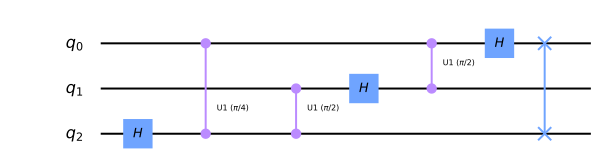

In [28]:
qft_swap(qc, qreg)
qc.draw('mpl')

## Full QFT

In [23]:
def QFT(circuit, qregister):
    """ QFT on a circuit.

    Parameters
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit.
    qregister(qiskit.QuantumRegister): Quantum register for the rotation.

    Output
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit with
                                    qft.
    
    """
    qft_rotations(circuit, qregister)
    qft_swap(circuit, qregister)
    return circuit

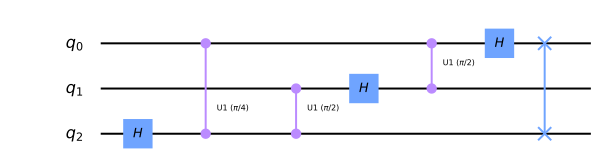

In [29]:
qreg = qsk.QuantumRegister(3, name='q')
qc = qsk.QuantumCircuit(qreg)
QFT(qc, qreg)
qc.draw('mpl')

## N = 4

### Circuit

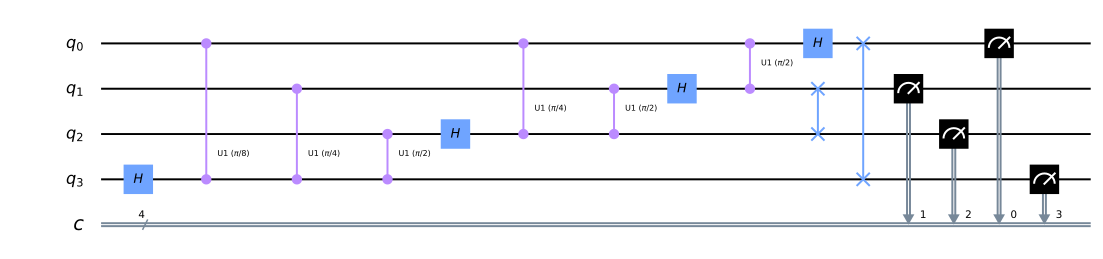

In [31]:
qreg = qsk.QuantumRegister(4, name='q')
qc = qsk.QuantumCircuit(qreg)
QFT(qc, qreg)
creg = qsk.ClassicalRegister(4, name='c')
qc.add_register(creg)
qc.measure(qreg, creg)
qc.draw(output='mpl')

### Simulation

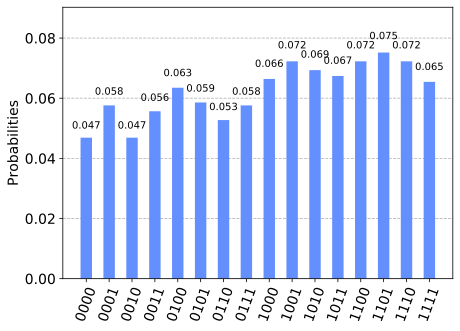

In [36]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [41]:
def qft(circuit,qregister):
    """QFT. 

    Parameters
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit.
    qregister(qiskit.QuantumRegister): Quantum register for the rotation.

    Output
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit with
                                    qft.
    
    """
    qft_circuit= QFT(qsk.QuantumCircuit(qregister, name='QFT'), qregister)
    circuit.append(qft_circuit, qregister)
    return circuit

In [44]:
def inverse_QFT(circuit,qregister):
    """ Inverse QFT. 

    Parameters
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit.
    qreg(int): Quantum register for the rotation.

    Output
    ------------------------------------------------
    circuit(qiskit.QuantumCircuit): Quantum Circuit with
                                    qft.
    
    """
    qft_circuit= qft(qsk.QuantumCircuit(qregister, name='QFT'), qregister)
    inverseqft = qft_circuit.inverse()
    circuit.append(inverseqft, qregister)
    return circuit

Let's show that the inverse_QFT is indeed the inverse

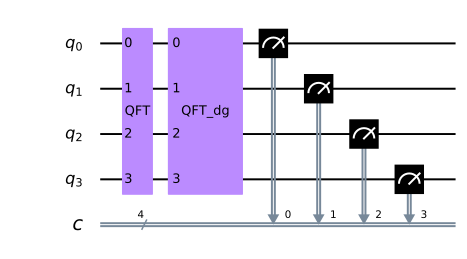

In [45]:
qreg = qsk.QuantumRegister(4, name='q')
qc = qsk.QuantumCircuit(qreg)
qft(qc, qreg)
inverse_QFT(qc, qreg)
creg = qsk.ClassicalRegister(4, name='c')
qc.add_register(creg)
qc.measure(qreg, creg)
qc.draw(output='mpl')

### Simulation

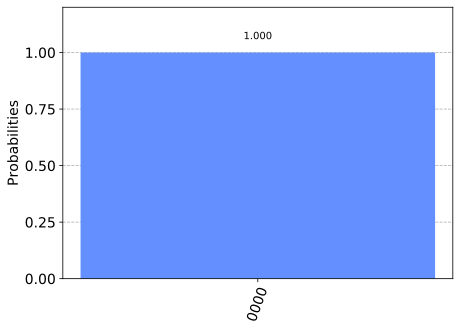

In [46]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

----------------------------------------------------------------------------------------------------

In [48]:
import qiskit.tools.jupyter
%qiskit_version_table